In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
df = pd.read_csv("../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
20289,59,0,0,20170111201348742.jpg.chip.jpg,127 158 172 197 199 190 189 199 186 201 198 20...
9547,28,1,0,20170113151043367.jpg.chip.jpg,61 69 81 100 103 106 110 117 123 119 120 117 1...
7225,26,1,0,20170114031951577.jpg.chip.jpg,251 250 233 128 48 59 86 86 89 97 102 106 113 ...
8731,27,1,1,20170113001021322.jpg.chip.jpg,96 97 108 106 112 119 125 127 129 129 131 132 ...
13953,35,2,0,20170116181329511.jpg.chip.jpg,29 59 42 48 62 83 115 112 116 127 136 143 154 ...


In [3]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [4]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

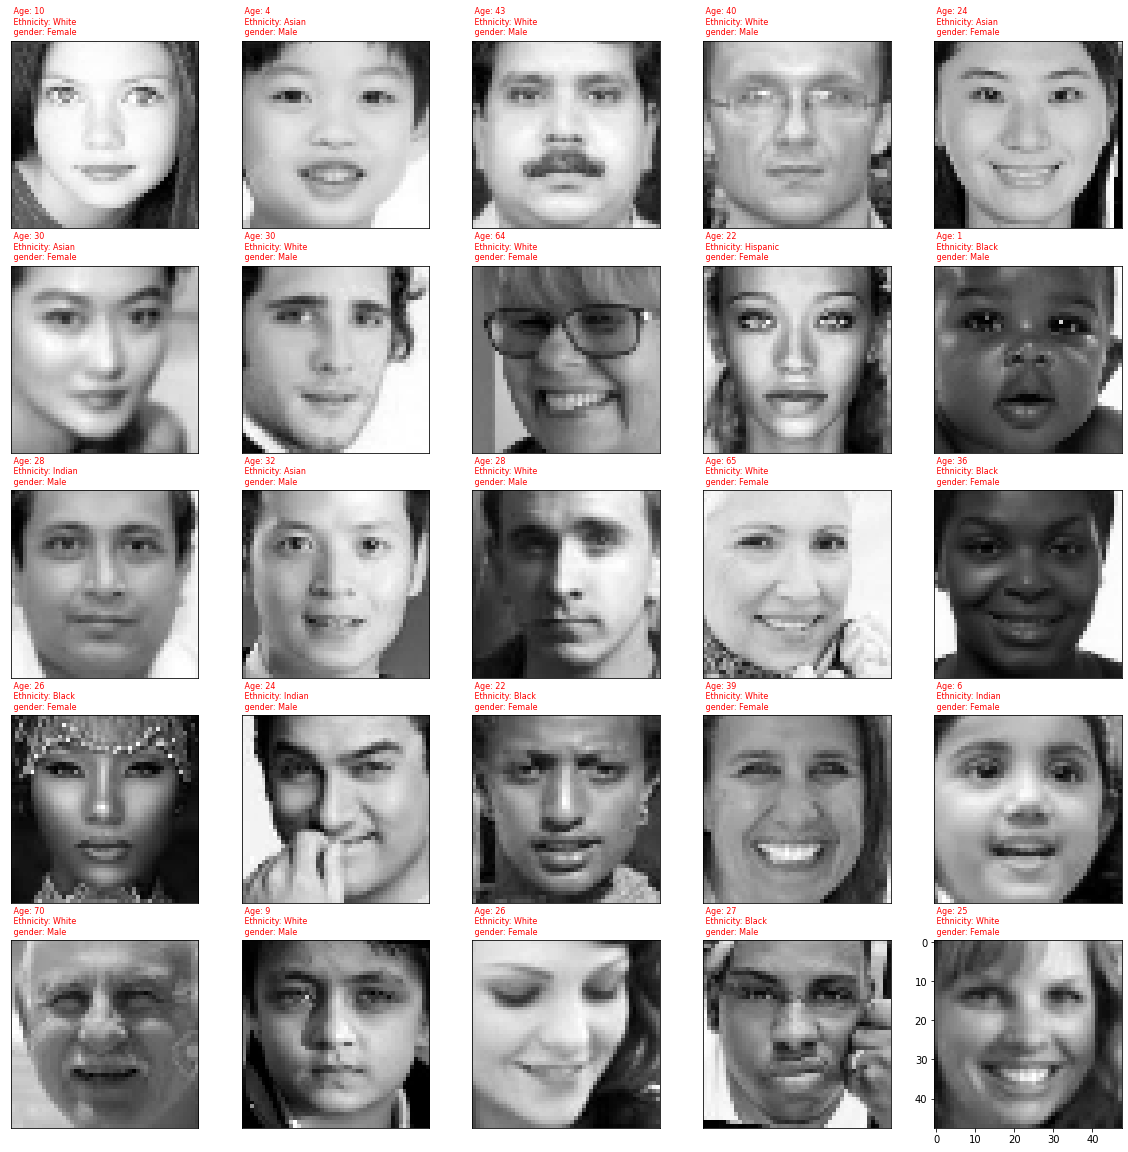

In [5]:
plt.figure(figsize=(20, 20))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

In [6]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
y = df['age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, y, test_size=0.3, random_state=44)

In [7]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator_age=train_datagen.flow(
    X_train_age ,y_train_age ,batch_size=32 
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator_age=test_datagen.flow(
    X_test_age ,y_test_age ,batch_size=32 
 
)

In [8]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [9]:
model_age = Sequential()

model_age.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model_age.add(MaxPooling2D(2,2))


model_age.add(Conv2D(64,(3,3),activation='relu'))
model_age.add(MaxPooling2D(2,2))


model_age.add(Conv2D(64,(3,3),activation='relu'))
model_age.add(MaxPooling2D(2,2))
model_age.add(Dropout(0.2))

model_age.add(Conv2D(128,(3,3),activation='relu'))
model_age.add(MaxPooling2D(2,2))
model_age.add(Dropout(0.2))          
          
model_age.add(Flatten())
model_age.add(Dropout(0.5))            

model_age.add(Dense(1,activation='relu'))

model_age.compile(optimizer='adam' ,loss='mean_squared_error',metrics=['mae'])

model_age.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [10]:
model_age.fit(
    train_generator_age, 
    epochs= 40,
    validation_data= test_generator_age,
    callbacks= callbacks
)

Epoch 1/40
519/519 [==============================] - 10s 6ms/step - loss: 458.0159 - mae: 16.4710 - val_loss: 374.1281 - val_mae: 14.1765
Epoch 2/40
519/519 [==============================] - 3s 6ms/step - loss: 370.1002 - mae: 14.8602 - val_loss: 312.9696 - val_mae: 13.0991
Epoch 3/40
519/519 [==============================] - 3s 6ms/step - loss: 321.4967 - mae: 13.8232 - val_loss: 273.7271 - val_mae: 12.1942
Epoch 4/40
519/519 [==============================] - 3s 6ms/step - loss: 286.7711 - mae: 12.9982 - val_loss: 210.1617 - val_mae: 11.4204
Epoch 5/40
519/519 [==============================] - 3s 6ms/step - loss: 265.5021 - mae: 12.4727 - val_loss: 191.3536 - val_mae: 10.5661
Epoch 6/40
519/519 [==============================] - 3s 6ms/step - loss: 244.8910 - mae: 11.9122 - val_loss: 181.7441 - val_mae: 10.1784
Epoch 7/40
519/519 [==============================] - 3s 6ms/step - loss: 232.0533 - mae: 11.5743 - val_loss: 186.4985 - val_mae: 10.0783
Epoch 8/40
519/519 [=============

<AxesSubplot:title={'center':'Age'}>

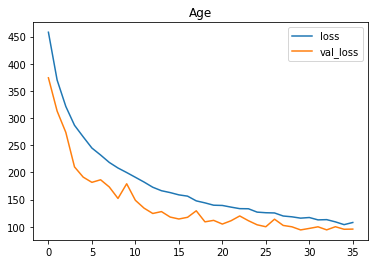

In [11]:
losses_age = pd.DataFrame(model_age.history.history)
losses_age[['loss','val_loss']].plot(title='Age')



In [12]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [13]:
train_generator_ethnicity =train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=64
)

test_generator_ethnicity =test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=64
)

In [14]:
model_ethnicity = Sequential()

model_ethnicity.add(Conv2D(16,(3,3), padding='same',activation='relu',input_shape=(48,48,1)))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))


model_ethnicity.add(Flatten())
model_ethnicity.add(Dense(128,activation='relu'))


model_ethnicity.add(Dense(5,activation='softmax'))

model_ethnicity.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ethnicity.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [15]:
model_ethnicity.fit(
    train_generator_ethnicity, 
    epochs= 10,
    validation_data= test_generator_ethnicity,
    callbacks= callbacks
)

Epoch 1/10
260/260 [==============================] - 2s 7ms/step - loss: 1.1895 - accuracy: 0.5401 - val_loss: 0.9404 - val_accuracy: 0.6599
Epoch 2/10
260/260 [==============================] - 2s 6ms/step - loss: 0.8575 - accuracy: 0.6960 - val_loss: 0.8092 - val_accuracy: 0.7143
Epoch 3/10
260/260 [==============================] - 2s 6ms/step - loss: 0.7474 - accuracy: 0.7405 - val_loss: 0.7422 - val_accuracy: 0.7440
Epoch 4/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6724 - accuracy: 0.7675 - val_loss: 0.7486 - val_accuracy: 0.7511
Epoch 5/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6220 - accuracy: 0.7837 - val_loss: 0.7008 - val_accuracy: 0.7546
Epoch 6/10
260/260 [==============================] - 2s 6ms/step - loss: 0.5811 - accuracy: 0.7979 - val_loss: 0.6568 - val_accuracy: 0.7731
Epoch 7/10
260/260 [==============================] - 2s 7ms/step - loss: 0.5460 - accuracy: 0.8095 - val_loss: 0.6751 - val_accuracy: 0.7638
Epoch 

<AxesSubplot:title={'center':'Ethnicity'}>

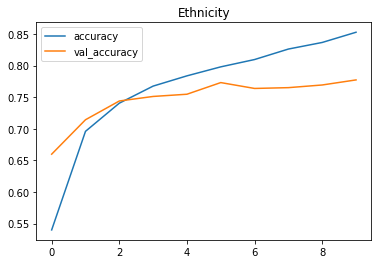

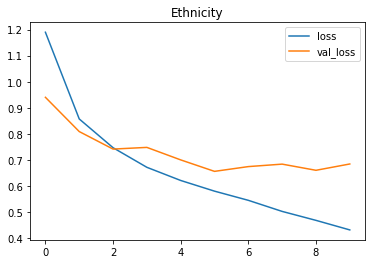

In [16]:
losses_ethnicity = pd.DataFrame(model_ethnicity.history.history)
losses_ethnicity[['accuracy','val_accuracy']].plot(title='Ethnicity')
losses_ethnicity[['loss','val_loss']].plot(title='Ethnicity')


In [17]:
y = df['gender']
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y, test_size=0.3, random_state=44)

In [18]:
train_generator_gender =train_datagen.flow(
    X_train_gender ,y_train_gender ,batch_size=32
)

test_generator_gender =test_datagen.flow(
    X_test_gender ,y_test_gender ,batch_size=32
)

In [19]:
model_gender = Sequential()

model_gender.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(64,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(64,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Flatten())
model_gender.add(Dense(1,activation='sigmoid'))

model_gender.compile(optimizer='SGD' ,loss='BinaryCrossentropy',metrics=['accuracy'])

model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [20]:
model_gender.fit(
    train_generator_gender, 
    epochs= 20,
    validation_data= test_generator_gender,
    callbacks= callbacks
)

Epoch 1/20
519/519 [==============================] - 3s 5ms/step - loss: 0.6898 - accuracy: 0.5389 - val_loss: 0.6853 - val_accuracy: 0.6257
Epoch 2/20
519/519 [==============================] - 3s 5ms/step - loss: 0.6785 - accuracy: 0.6279 - val_loss: 0.6670 - val_accuracy: 0.6687
Epoch 3/20
519/519 [==============================] - 3s 6ms/step - loss: 0.6492 - accuracy: 0.6555 - val_loss: 0.6193 - val_accuracy: 0.6900
Epoch 4/20
519/519 [==============================] - 3s 5ms/step - loss: 0.6050 - accuracy: 0.6832 - val_loss: 0.5771 - val_accuracy: 0.7051
Epoch 5/20
519/519 [==============================] - 3s 5ms/step - loss: 0.5667 - accuracy: 0.7134 - val_loss: 0.5330 - val_accuracy: 0.7478
Epoch 6/20
519/519 [==============================] - 3s 5ms/step - loss: 0.5175 - accuracy: 0.7539 - val_loss: 0.5060 - val_accuracy: 0.7472
Epoch 7/20
519/519 [==============================] - 3s 5ms/step - loss: 0.4711 - accuracy: 0.7869 - val_loss: 0.4722 - val_accuracy: 0.7885
Epoch 

<AxesSubplot:title={'center':'Gender'}>

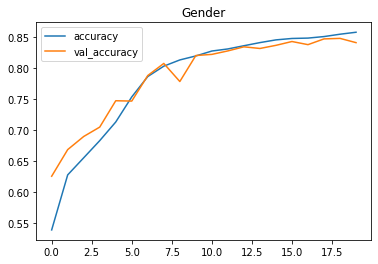

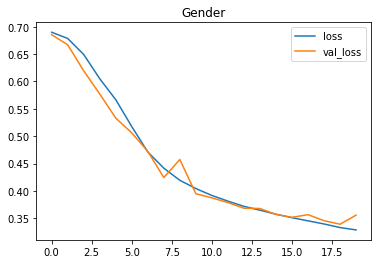

In [21]:
losses_gender = pd.DataFrame(model_gender.history.history)
losses_gender[['accuracy','val_accuracy']].plot(title='Gender')
losses_gender[['loss','val_loss']].plot(title='Gender')